# Introduction

Real-world data rarely comes clean. This project on 'Data Wrangling' involves 3 main steps namely:-
 1. Gathering
 2. Assessing
 3. Cleaning

Throughout this project several python libraries will be used to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

__The Dataset__

The dataset that i will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## 1. Gathering

This step involves gathering data from 3 different sources as shown below :-

##### 1. Download the file "twitter_archive_enhanced.csv" manually from the given link and read it. This file is from the WeRateDogs Twitter archive. 

In [1]:
import pandas as pd

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 2. Programmatically download  "tweet image predictions" using Requests library

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [2]:
import requests
import os

folder_name = 'Data Wrangling Project Files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [3]:
os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')

##### 3. Use Tweepy library to query Twitter's API for additional data

__ Code used to query the twitter ApI to gather tweet_json.txt __

###### Create API object to access the needed information
import tweepy
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

###### Query and write the collected data to a text file
import pandas as pd

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
tweet_id = twitter_archive.tweet_id

file = open('tweet_json.txt','w') 
for id in tweet_id:
    
    try:
        tweet = api.get_status(id)
        a=  tweet.text
        b=  tweet.favorite_count
        c= tweet.retweet_count
        file.write(a +'\n')
        file.write( str(b) +'\n')
        file.write(str(c) +'\n')
        
    except: 
        file.write('NA'+ '\n')
        file.write('NA'+ '\n')
        file.write('NA'+ '\n')
           
file.close()

In [5]:
# counting total number of lines in txt file
with open('tweet_json.txt') as f:
    print sum(1 for _ in f)

7068


In [6]:
df_list = []
with open('tweet_json.txt') as file:
    # 7068/3 = 2356, so use a range from 1 to 2357 to get all rows from "tweet_json.txt"
    for x in range(1, 2357):
        text = file.readline()[:-1]
        favorite_count = file.readline()[:-1]
        retweet_count = file.readline()[:-1]
        df_list.append({'text': text,
                         'favorite_count': favorite_count,
                          'retweet_count': retweet_count})
        x= x+1
import pandas as pd
df = pd.DataFrame(df_list, columns=['text','favorite_count','retweet_count'])

In [7]:
df

,text,favorite_count,retweet_count
0,This is Phineas. He's a mystical boy. Only eve...,39164,8719
1,NA,NA,NA
2,NA,NA,NA
3,This is Darla. She commenced a snooze mid meal...,42534,8814
4,NA,NA,NA
5,NA,NA,NA
6,NA,NA,NA
7,NA,NA,NA
8,NA,NA,NA
9,NA,NA,NA


## 2. Assessing

This step involves assessing the 3 datasets collected above (from 3 different sources) both visually and programmatically and find out quality and tidiness issues. 

#### Visual Assessment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweet_json = df
tweet_json

,text,favorite_count,retweet_count
0,This is Phineas. He's a mystical boy. Only eve...,39164,8719
1,NA,NA,NA
2,NA,NA,NA
3,This is Darla. She commenced a snooze mid meal...,42534,8814
4,NA,NA,NA
5,NA,NA,NA
6,NA,NA,NA
7,NA,NA,NA
8,NA,NA,NA
9,NA,NA,NA


#### Programmatic Assessment

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [13]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
text              2356 non-null object
favorite_count    2356 non-null object
retweet_count     2356 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


In [14]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
image_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [19]:
image_pred.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [20]:
image_pred.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'dingo', 'power_drill', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig',
       'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater',
       'Brabancon_griffon', 'standard_poodle', 'beagle',
       'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [21]:
image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [22]:
image_pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [23]:
image_pred.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### Quality issues
__'twitter_archive' table__

*  tweet_id column should be of object type, not integer.
* Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', and 'retweeted_status_timestamp' columns can instead be left as null or filled with new values.
* 'timestamp' and 'retweeted_status_timestamp' are of object type instead of datetime.
* We only want to deal with non retweet tweets, hence the first rows where retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are not empty, must be removed.
* The columns doggo, floofer, pupper and puppo can be converted to have true/false values instead of None values.

__'tweet_json' table__

* Missing values in 'favorite_count' and 'retweet_count' columns. They can be left as null, or added with new values.
* 'favorite_count' and 'retweet_count' are object type and should be converted to numeric type.

__'image_pred' table__

* Nondescriptive column headers p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog .
* The columns p1,p2 and p3 are various breeds of dogs and hence must be categorical instead of object type.
* The columns p1_dog, p2_dog and p3_dog must be of type bool.
* The columns 'p1', 'p2', 'p3' represent things which are not dogs. We can use False values in p1_dog, p2_dog and p3_dog to remove these non dog entries.

### Tidiness issues

* All the 3 tables namely 'twitter_archive', 'image_pred' and 'tweet_json' have the same observational unit 'tweet_id'.

* The rating_numerator and rating_denominator must be combined into single column Overall_rating.


# Cleaning

### Define
 * Combine all the 3 tables 'twitter_archive', 'image_pred' and 'tweet_json' into a single table.
 

### Code

In [24]:
# Create a copy of the dataset before cleaning
df_clean = twitter_archive.copy()

# Add 2 new columns favorite_count and retweet_count to twitter_archive from tweet_json
df_clean['favorite_count'] = tweet_json.favorite_count
df_clean['retweet_count'] = tweet_json.retweet_count
# Now join all the columns of 'image_pred' to df_clean
df2_clean = pd.merge(df_clean,
                    image_pred,
                    left_on='tweet_id',
                    right_on='tweet_id',
                    how='right')

### Test

In [25]:
df2_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Define
* Convert tweet_id column to object type as, we are not going to perform mathematical operations over them, those are labels or identifiers.
* Convert 'timestamp' and 'retweeted_status_timestamp' to datetime.
* Convert the columns doggo, floofer, pupper and puppo to bool type.
* Convert 'favorite_count' and 'retweet_count'to numeric type.
* Give descriptive column names to p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog .

### Code

In [26]:
# Create another copy of the above cleaned dataset before further cleaning
df_clean_1 =df2_clean.copy()

# Convert tweet_id column to object type as, those are labels or identifiers.
df2_clean.tweet_id = df2_clean.tweet_id.astype('object')

# Convert 'timestamp' and 'retweeted_status_timestamp' to datetime
df2_clean['timestamp'] = pd.to_datetime(df2_clean['timestamp'])
df2_clean['retweeted_status_timestamp'] = pd.to_datetime(df2_clean['retweeted_status_timestamp'])

# Convert the columns doggo, floofer, pupper and puppo to true/false values
df2_clean['doggo'] = (df2_clean['doggo'] == 'doggo').astype(bool)
df2_clean['floofer'] =(df2_clean['floofer'] == 'floofer').astype(bool)
df2_clean['pupper'] = (df2_clean['pupper'] == 'pupper').astype(bool)
df2_clean['puppo'] = (df2_clean['puppo'] == 'puppo').astype(bool)

# Convert 'favorite_count' and 'retweet_count'to numeric type
df2_clean[['favorite_count','retweet_count']] = df2_clean[['favorite_count','retweet_count']].apply(
                                                                                            pd.to_numeric,
                                                                                            errors='coerce')

# Give descriptive column names to p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog 
df2_clean = df2_clean.rename(columns =
                            {'p1': 'Possible_breed_1',
                            'p2': 'Possible_breed_2',
                            'p3': 'Possible_breed_3',
                            'p1_conf': 'Breed_1_confidence',
                            'p2_conf': 'Breed_2_confidence',
                            'p3_conf': 'Breed_3_confidence',
                            'p1_dog': 'Breed_1_present',
                            'p2_dog': 'Breed_2_present',
                            'p3_dog': 'Breed_3_present'})

### Test

In [27]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null datetime64[ns]
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null bool
floofer                       2075 non-null bool
pupper                        2075 non-null bool
puppo                         2075 non-null bool
favorite_count            

### Define
* Convert Possible_breed_1,Possible_breed_2,Possible_breed_3 to category type
* Convert Breed_1_present, Breed_2_present, Breed_3_present to the type bool.
* Remove the retweets so that we have only original tweets.
* Remove records of Possible_breed_1, Possible_breed_2, Possible_breed_3 which are not dogs i.e which have 'False' values in Breed_1_present, Breed_2_present and Breed_3_present.

### Code

In [28]:
# Convert Possible_breed_1,Possible_breed_2,Possible_breed_3 to category type
df2_clean.Possible_breed_1 = df2_clean.Possible_breed_1.astype('category')
df2_clean.Possible_breed_2 = df2_clean.Possible_breed_2.astype('category')
df2_clean.Possible_breed_3 = df2_clean.Possible_breed_3.astype('category')

# Convert Breed_1_present, Breed_2_present, Breed_3_present to the type bool
df2_clean.Breed_1_present = df2_clean.Breed_1_present.astype('bool')
df2_clean.Breed_2_present = df2_clean.Breed_2_present.astype('bool')
df2_clean.Breed_3_present = df2_clean.Breed_3_present.astype('bool')

# Remove the retweets so that we have only original tweets i.e remove rows for which retweeted_status_id != NaN
df2_clean = df2_clean[df2_clean.retweeted_status_id.isnull()]

In [29]:
# Also we can delete the retweet columns as we don't need retweets
del df2_clean['retweeted_status_id']
del df2_clean['retweeted_status_user_id']
del df2_clean['retweeted_status_timestamp']

In [31]:
# Create a copy called df_unclean which is the dataset having things which are not dogs
df_unclean = df2_clean.copy()

In [32]:
# Remove records of Possible_breed_1, Possible_breed_2, Possible_breed_3 which are not dogs
df2_clean = df2_clean[df2_clean['Breed_1_present']| df2_clean['Breed_2_present']| df2_clean['Breed_3_present']]

### Test

In [33]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2074
Data columns (total 27 columns):
tweet_id                 1686 non-null object
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null datetime64[ns]
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
rating_numerator         1686 non-null int64
rating_denominator       1686 non-null int64
name                     1686 non-null object
doggo                    1686 non-null bool
floofer                  1686 non-null bool
pupper                   1686 non-null bool
puppo                    1686 non-null bool
favorite_count           1442 non-null float64
retweet_count            1442 non-null float64
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
Possible_breed_1         1686 non-null category
Breed_1_confidence  

### Define
* Combine rating_numerator and rating_denominator into a single column Overall_rating.

### Code

In [34]:
df2_clean['Overall_rating'] = (df2_clean.rating_numerator)/(df2_clean.rating_denominator)

In [35]:
del df2_clean['rating_numerator']
del df2_clean['rating_denominator']

### Test

In [36]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2074
Data columns (total 26 columns):
tweet_id                 1686 non-null object
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1686 non-null datetime64[ns]
source                   1686 non-null object
text                     1686 non-null object
expanded_urls            1686 non-null object
name                     1686 non-null object
doggo                    1686 non-null bool
floofer                  1686 non-null bool
pupper                   1686 non-null bool
puppo                    1686 non-null bool
favorite_count           1442 non-null float64
retweet_count            1442 non-null float64
jpg_url                  1686 non-null object
img_num                  1686 non-null int64
Possible_breed_1         1686 non-null category
Breed_1_confidence       1686 non-null float64
Breed_1_present          1686 non-null bool
Possible_breed_2   

The missing values in  'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',  'retweeted_status_timestamp',  'favorite_count' and 'retweet_count' columns cannot be treated as we cannot collect and add those missing values.

# Storing, Analyzing and Visualizing Data 

The final cleaned dataframe df2_clean can now be stored as CSV file named twitter_archive_master.csv.

In [37]:
df2_clean.to_csv('twitter_archive_master.csv')

#### Plot Piechart to find the difference in 'Possible_breed_1' column between clean dataset (having only dog entries) and unclean dataset

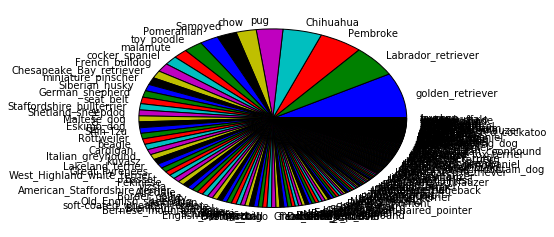

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot all possible dog breeds for df2_clean which has only dogs
df2_clean.Possible_breed_1.value_counts().plot(kind ='pie')

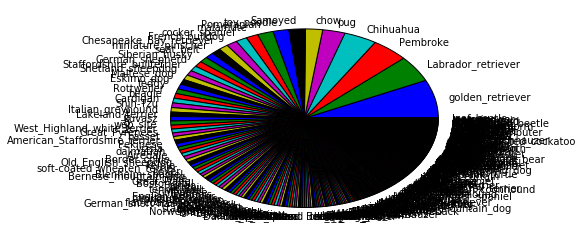

In [39]:
# plot all possible dog breeds for df_unclean which has things other than dogs
df_unclean.Possible_breed_1.value_counts().plot(kind ='pie')

#### Analyze 'Overall_rating' column to find number of entries with Overall_rating >=1

In [40]:
# plotting number of entries having overall_rating >=1
df2_clean['rating_morethan_one'] = df2_clean.Overall_rating >=1
df2_clean.rating_morethan_one.value_counts()

True     1406
False     280
Name: rating_morethan_one, dtype: int64

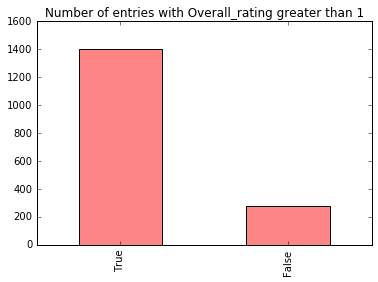

In [41]:
df2_clean.rating_morethan_one.value_counts().plot(kind ='bar',
                              title ='Number of entries with Overall_rating greater than 1',
                              color = '#fe8585')

### Insights
* As seen from the two piecharts plotted above, the clean dataset i.e df2_clean has higher proportion of dog breeds like golden_retriever, Labrador_retriever, Chihuahua, Pembroke etc , but there is comparatively lesser proportion of dogs in df_unclean (the unclean dataset).
* Only 280 entries of dogs have Overall_ratings less than 1 , and the rest 1406 entries have Overall_rating greater than 1.
* The 5 most popular dog breeds from the above dataset are golden_retriever, Labrador_retriever, Pembroke, Chihuahua and pug.